<a href="https://colab.research.google.com/github/larrychen20011120/NCKU-Quanta-Intern/blob/main/HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the library 

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Sampling the series

In [43]:
def sample_unit(prob_vec):
    sample_value = random.random()
    accumulator = 0
    for index, prob in enumerate(prob_vec):
        accumulator += prob
        if sample_value <= accumulator:
            return index

def sample_series(trans_matrix, emit_matrix, init_prob, series_len):
    current_state = sample_unit(init_prob)
    state_series = [ current_state ]
    observ_series = [ sample_unit(emit_matrix[current_state, :]) ]

    for _ in range(series_len-1):
        current_state = sample_unit(trans_matrix[current_state, :])
        state_series.append( current_state )
        observ_series.append( sample_unit(emit_matrix[current_state, :]) )
    return state_series, observ_series


## Viterbi Algorithm

In [35]:
def decode(A, B, PI, N, M, T, observs):
    
    # final result
    max_prob, guess_series = 0, np.zeros((T, ), dtype=np.int8)
    # defined matrix for dynamic programming
    psi = np.zeros((T, N))
    delta = np.zeros((T, N))

    for t, observ in enumerate(observs):                # T times
        for state in range(N):                          # N times
            if t == 0: # initial
                delta[t, state] = PI[state] * B[state, observ]
            else:
                # dynamic programming
                inter_max = 0
                for inter_state in range(N):            # N times
                    value = delta[t-1][inter_state] * A[inter_state, state]
                    if value > inter_max:
                        inter_max = value
                        psi[t, state] = inter_state
                delta[t, state] = inter_max * B[state, observ] 
    
    # collect the final result
    for state in range(N):
        if delta[T-1][state] > max_prob:
            max_prob, guess_series[T-1] = delta[T-1][state], state
    for t in range(T-1, 0, -1):
        guess_series[t-1] = psi[t, guess_series[t]]
    return guess_series

## Setting Parameters

In [ ]:
TIME_RANGE = 15
STATE_NUM = 3
OBSERV_NUM = 3
STATE_NAMES = ("Sunny", "Cloudy", "Rainy")
OBSERV_NAMES = ("Park", "Store", "Home")

trans_matrix = np.array([
    [0.7, 0.2, 0.1],
    [0.2, 0.4, 0.4],
    [0.15, 0.35, 0.5]
])
emit_matrix = np.array([
    [0.55, 0.25, 0.2],
    [0.4, 0.3, 0.3],
    [0.05, 0.25, 0.7]
])
init_prob = np.array([0.45, 0.35, 0.2])

## Analysis

In [ ]:
states, observs = sample_series(trans_matrix, emit_matrix, init_prob, TIME_RANGE)
print("States' Transition:")
for state in states:
    if state is not None:
        print(STATE_NAMES[state], end="  ")
print()
print()
print("Observations:")
for observ in observs:
    if observ is not None:
        print(OBSERV_NAMES[observ], end="  ")

States' Transition:
Sunny  Cloudy  Rainy  Rainy  Rainy  Rainy  Cloudy  Rainy  Rainy  Cloudy  Sunny  Sunny  Sunny  Cloudy  Rainy  

Observations:
Park  Store  Home  Home  Home  Home  Home  Home  Home  Home  Park  Park  Park  Park  Park  

In [ ]:
guess_series = decode(
    A=trans_matrix, B=emit_matrix, PI=init_prob,
    N=STATE_NUM, M=OBSERV_NUM, T=TIME_RANGE, observs=observs
)
print(guess_series)
print()
print("Guess States' Transition:")
for guess in guess_series:
    if guess is not None:
        print(STATE_NAMES[guess], end="  ")

[1 2 2 2 2 2 2 2 2 2 0 0 0 0 0]

Guess States' Transition:
Cloudy  Rainy  Rainy  Rainy  Rainy  Rainy  Rainy  Rainy  Rainy  Rainy  Sunny  Sunny  Sunny  Sunny  Sunny  

### Calculate ACC

In [ ]:
correct_count = 0
for t in range(TIME_RANGE):
    if guess_series[t] == states[t]:
        correct_count += 1
print(f"Accuracy: {correct_count / TIME_RANGE * 100:.2f}%")

Accuracy: 60.00%


## Compare different size and matrix types

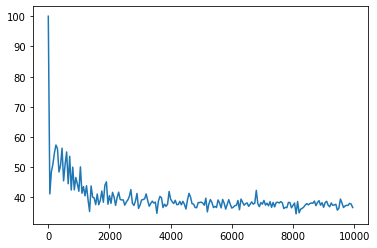

In [48]:
time_x = np.arange(1, 10000, 50)
acc_y = []
for x in time_x:
    
    states, observs = sample_series(trans_matrix, emit_matrix, init_prob, x)
    guess_series = decode(
        A=trans_matrix, B=emit_matrix, PI=init_prob,
        N=STATE_NUM, M=OBSERV_NUM, T=x, observs=observs
    )
    correct_count, acc = 0, 0
    for t in range(x):
        if guess_series[t] == states[t]:
            correct_count += 1
    acc = correct_count / x * 100
    acc_y.append(acc)

plt.plot(time_x, acc_y)
plt.show()

In [46]:
A1 = np.array([
    [0.8, 0.1, 0.1],
    [0.1, 0.05, 0.85],
    [0.05, 0.9, 0.05]
])
B1 = np.array([
    [0.05, 0.85, 0.1],
    [0.15, 0.1, 0.75],
    [0.05, 0.2, 0.75]
])
A2 = np.array([
    [0.3, 0.3, 0.4],
    [0.4, 0.4, 0.2],
    [0.35, 0.35, 0.3]
])
B2 = np.array([
    [0.33, 0.33, 0.34],
    [0.4, 0.35, 0.25],
    [0.3, 0.4, 0.3]
])
A3 = np.array([
    [0.8, 0.1, 0.1],
    [0.1, 0.05, 0.85],
    [0.05, 0.9, 0.05]
])
B3 = np.array([
    [0.33, 0.33, 0.34],
    [0.4, 0.35, 0.25],
    [0.3, 0.4, 0.3]
])
A4 = np.array([
    [0.3, 0.3, 0.4],
    [0.4, 0.4, 0.2],
    [0.35, 0.35, 0.3]
])
B4 = np.array([
    [0.05, 0.85, 0.1],
    [0.15, 0.1, 0.75],
    [0.05, 0.2, 0.75]
])
AB_sets = (
    (A1, B1), (A2, B2), (A3, B3), (A4, B4)
)

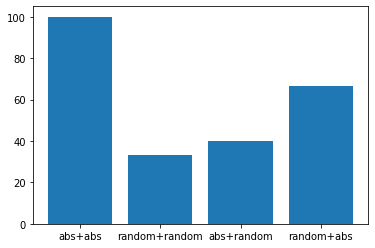

In [33]:
type_x = ['abs+abs', 'random+random', 'abs+random', 'random+abs']
acc_y = []
for A_mat, B_mat in AB_sets:
    states, observs = sample_series(A_mat, B_mat, init_prob, TIME_RANGE)
    guess_series = decode(
        A=A_mat, B=B_mat, PI=init_prob,
        N=STATE_NUM, M=OBSERV_NUM, T=TIME_RANGE, observs=observs
    )
    correct_count = 0
    for t in range(TIME_RANGE):
        if guess_series[t] == states[t]:
            correct_count += 1
    acc_y.append(correct_count / TIME_RANGE * 100)
plt.bar(type_x, acc_y)
plt.show()

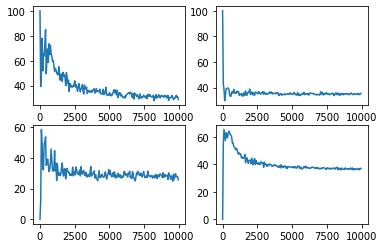

In [47]:
time_x = np.arange(1, 10000, 50)
acc_y = [[], [], [], []]
index = 0
for A_mat, B_mat in AB_sets:
    for x in time_x:
        
        states, observs = sample_series(A_mat, B_mat, init_prob, x)
        guess_series = decode(
            A=A_mat, B=B_mat, PI=init_prob,
            N=STATE_NUM, M=OBSERV_NUM, T=x, observs=observs
        )
        correct_count, acc = 0, 0
        for t in range(x):
            if guess_series[t] == states[t]:
                correct_count += 1
        acc = correct_count / x * 100
        acc_y[index].append(acc)
    index += 1
fig = plt.figure()
plt.subplot(221)
plt.plot(time_x, acc_y[0])
plt.subplot(222)
plt.plot(time_x, acc_y[1])
plt.subplot(223)
plt.plot(time_x, acc_y[2])
plt.subplot(224)
plt.plot(time_x, acc_y[3])
plt.show()